In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 12, 8

In [3]:
def generate_observations(func, x_values, sigma=100):
    mu = 0
    errors = np.random.normal(mu, sigma, len(x_values))
    x_and_errors = zip(x_values, errors)
    return [(pair[0], func(pair[0]), func(pair[0])+pair[1]) for pair in x_and_errors]

In [4]:
SIGMA = 120
func = lambda x: 0.5*x-5
points = generate_observations(func, list(range(0,1000,5)), sigma=SIGMA)

In [5]:
x = [i[0] for i in points]
y_real = [i[1] for i in points]
y_observed = [i[2] for i in points]

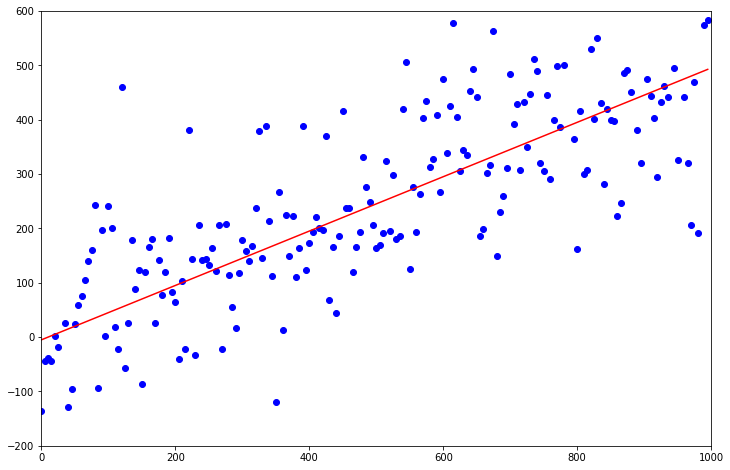

In [6]:
plt.ylim(-200, 600)
plt.xlim(0, 1000)
plt.scatter(x, y_observed, color='b')
plt.plot(x, y_real, color='r')

In [7]:
def accumulate_canonical_info(x_arr, y_arr):
    n = 1
    v = y_arr[0]*y_arr[0]
    u = np.array([1*y_arr[0], x_arr[0]*y_arr[0]])
    T = np.array(
        [[1, x_arr[0]],
         [x_arr[0], x_arr[0]*x_arr[0]]]
    )
    for i in range(1, len(x_arr)):
        n+=1
        v+=y_arr[i]*y_arr[i]
        u+=np.array([1*y_arr[i], x_arr[i]*y_arr[i]])
        T+=np.array(
        [[1, x_arr[i]],
         [x_arr[i], x_arr[i]*x_arr[i]]]
        )
    return (n-1, v, u, T)

In [8]:
predicted_func = lambda x, a, b: a*x+b
F = lambda n : np.array([1, x[n]])
rand_points = lambda n, lim: np.random.choice(lim, n, replace=False)
def plot_results(a, b, variance, variance_est):
    plt.ylim(-200, 600)
    plt.xlim(0, 1000)
    plt.scatter(x, y_observed, color='b')
    plt.plot(x, [predicted_func(x_point, a, b) for x_point in x], color='g', label='predicted')
    plt.plot(x, [predicted_func(x_point, a, b)+var for x_point, var in zip(x, variance)], color='y', label='upper_boundary')
    plt.plot(x, [predicted_func(x_point, a, b)-var for x_point, var in zip(x, variance)], color='y', label='lower_boundary')
    plt.plot(x[3:], [predicted_func(x_point, a, b)+var_est for x_point, var_est in zip(x, variance_est)], color='c')
    plt.plot(x[3:], [predicted_func(x_point, a, b)-var_est for x_point, var_est in zip(x, variance_est)], color='c',)

    plt.plot(x, y_real, color='r')

In [9]:
def get_results(n_points, sigma):
    variance = []
    idxs = rand_points(n_points,200)
    n, v, u, T = accumulate_canonical_info([x[i] for i in idxs], [y_observed[i] for i in idxs])
    b, a = [*np.linalg.inv(T).dot(u)]
    variance = [sigma*sigma*F(i).dot(np.linalg.inv(T)).dot(F(i)) for i in range(200)]
    variance_est = [
        (
            v-u.transpose().dot(
            np.linalg.inv(T)
            ).dot(u)
        )*(
            F(i).dot(
                np.linalg.inv(T)
            ).dot(
                F(i).transpose()
            )
        )/(i-2)
        for i in range(3,200)
    ]
    print(
        'a ={:9.5f}'.format(a), ' b = {:9.5f}\n'.format(b),
#         'idxs =', idxs,
#         '\nvaiance = ', variance
#         '\nvariance_est = ', variance_est   
    )
    plot_results(a, b, variance, variance_est)

a =  0.50719  b =   5.31812



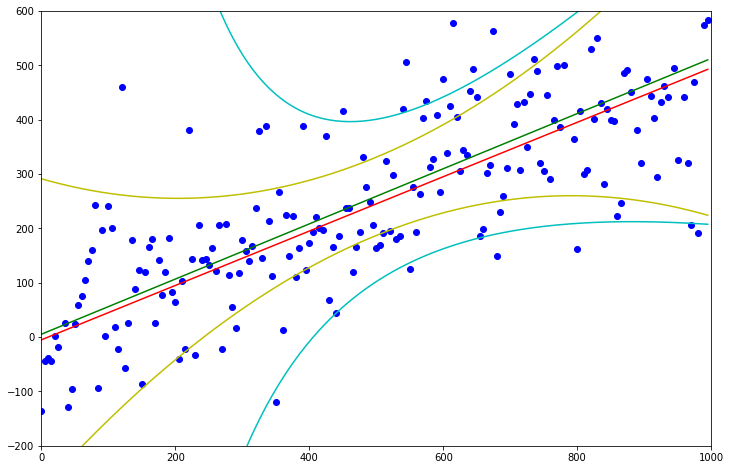

In [10]:
get_results(200, SIGMA)
# Yellow line is variance of function with known sigma squared,
# cyan one is variance estimate with unknown sigma squared

a =  0.39085  b =  44.34857



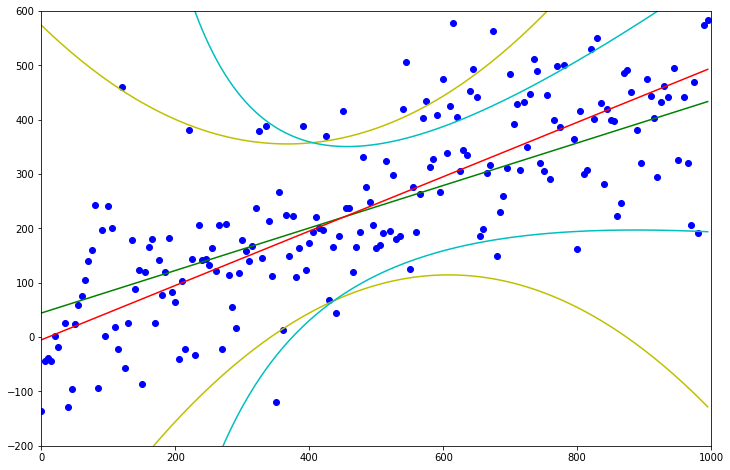

In [11]:
get_results(100, SIGMA)

a =  0.54229  b = -10.68879



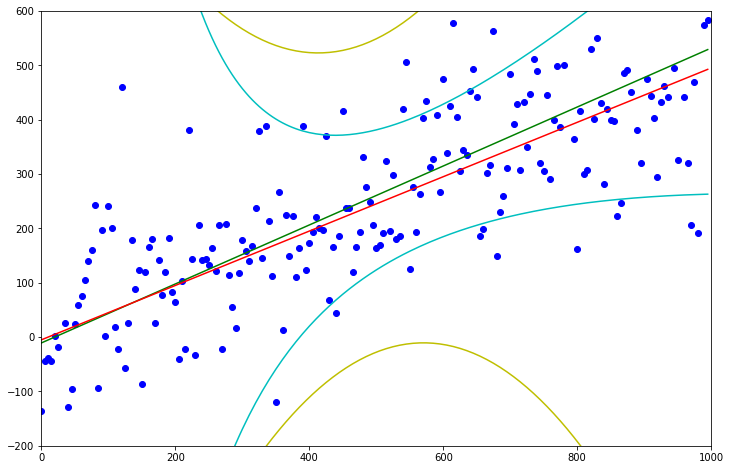

In [12]:
get_results(50, SIGMA)

a =  0.56208  b = -15.11507



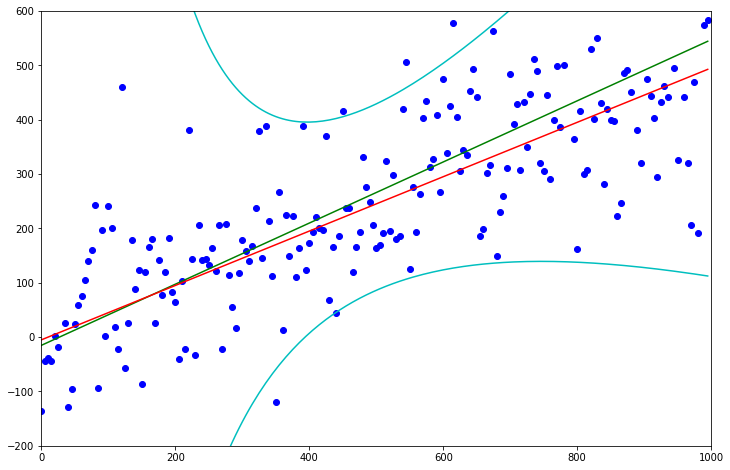

In [13]:
get_results(25, SIGMA)